# Title: Tree-based Intelligent Intrusion Detection System in Internet of Vehicles

#### Group Member Names : Sylvie Wette : 200608560 ; MohammadNoor Injadat: 200418395



### INTRODUCTION:
*********************************************************************************************************************
#### AIM : The research focuses on creating an intelligent Intrusion Detection System (IDS). It uses tree-structure machine learning models for the Internet of Vehicles (IoV). The goal is to effectively identify various cyber-attacks in autonomous vehicle networks. Additionally, the system aims to achieve high detection rates with low computational costs.

*********************************************************************************************************************
#### Github Repo: https://github.com/Western-OC2-Lab/Intrusion-Detection-System-Using-Machine-Learning/blob/main/Tree-based_IDS_GlobeCom19.ipynb

*********************************************************************************************************************
#### DESCRIPTION OF PAPER: The research article discusses the vulnerabilities of self-driving vehicles and the Internet of Vehicles that can be attacked by cyber criminals. These include denial of service, spoofing, and sniffing types of attacks. It introduces an intrusion detection system that uses the tree-based machine learning algorithms. These algorithms include Random Forest and XGBoost, combined with the ensemble learning and feature selection techniques. The performance of the system is evaluated using a commonly available open source datasets. The result of the research are the enhanced performance and lower computaional demands.

*********************************************************************************************************************
#### PROBLEM STATEMENT : The increasing complexity and connectivity of vehicle systems expose them to numerous cyber threats. These threats impact vehicle safety and data security. Conventional security mechanisms are insufficient for the emerging needs of the Internet of Vehicles. Therefore, a robust intrusion detection system is necessary. This system must safeguard both intra-vehicle and external communications from a wide array of cyber-attacks.¶

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM: As vehicles become more autonomous and interconnected, the volume and variety of cyber threats increase. Existing systems lack the capability to dynamically identify and respond to sophisticated attacks effectively. The research focuses on the Internet of Vehicles environment. This environment is particularly susceptible to attacks due to its open and heterogeneous nature.¶
*
*********************************************************************************************************************
#### SOLUTION: The proposed solution is a multi-layered IDS that uses advanced machine learning techniques to analyze network traffic and detect anomalies. The system employs a combination of decision trees, Random Forest, extra trees, and XGBoost algorithms. These are enhanced by a stacking ensemble method for improved accuracy. Feature selection is used to optimize the computational efficiency of the system. The IDS is designed to be implemented across both intra-vehicle networks, such as CAN buses, and broader vehicle-to-everything communications systems. This provides comprehensive protection against various cyber threats.
*


# Background
*********************************************************************************************************************
Reference

The research paper does not specifically mention earlier studies by name. However, it does refer generally to the existing research while discussing how vehicular ad-hoc networks (VANETs) have developed into the Internet of Vehicles (IoV).


Explanation

The paper explains that as autonomous and connected vehicles become more common, so do the complexities and vulnerabilities of these technologies. It outlines various cyber-attacks, such as denial of service, spoofing, and sniffing, which threaten vehicle safety and data security. There is a critical need for robust security systems to manage these risks, given the shortcomings of conventional security mechanisms for the advanced needs of IoV.


Dataset/Input

For evaluating the proposed IDS, the research utilizes standard open-source datasets that are commonly used within the community for similar security testing. Two specific datasets mentioned are:

    CAN-intrusion dataset: Used for intra-vehicle network intrusion detection.
    
    CICIDS2017 dataset: Used for broader network intrusion detection scenarios, reflecting updated and comprehensive attack simulations.
    

Weakness

The paper identifies significant weaknesses in existing systems, especially their inability to dynamically and effectively respond to sophisticated cyber threats. It highlights the limitations of current intrusion detection systems against complex network configurations like the IoV. These systems struggle with the diverse range of devices and communication technologies. They often cannot handle increased data traffic, a variety of attack vectors, and the real-time response requirements of advanced vehicular networks.

*********************************************************************************************************************

# Implement paper code :
******************************************************************************************************************



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [3]:
#Read dataset
df = pd.read_csv('CICIDS2017_sample.csv')
# The results in this code is based on the sample CICIDS2017 dataset available in the GitHub repo. Please go to cell [10] if you work on the sampled dataset. 

In [4]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [5]:
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [6]:
# Randomly sample instances from majority classes
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [7]:
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_BruteForce).append(df_minor)

In [8]:
df_s = df_s.sort_index()

In [9]:
#No need for this step since we used the sample from the begining
# Save the sampled dataset
#df_s.to_csv('./data/CICIDS2017_sample.csv',index=0)

In [10]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [11]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [12]:
X_train.shape

(45328, 77)

In [13]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4       29
dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for the minority class "4"

In [15]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4     1500
dtype: int64

Accuracy of DT: 0.9955881055325156
Precision of DT: 0.9955734116350905
Recall of DT: 0.9955881055325156
F1-score of DT: 0.9955745170204882
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.98      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       1.00      1.00      1.00     11333



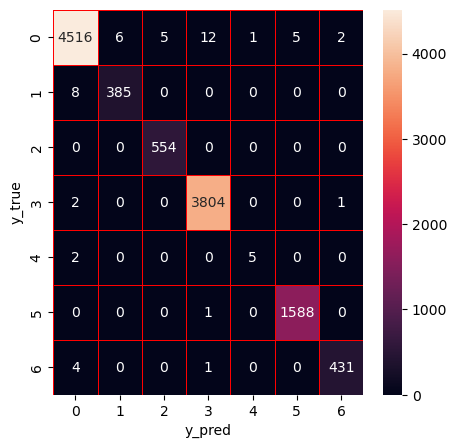

In [17]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [18]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9958528192005647
Precision of RF: 0.9958595703406016
Recall of RF: 0.9958528192005647
F1-score of RF: 0.9958351691632119
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.97      0.98      0.98       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



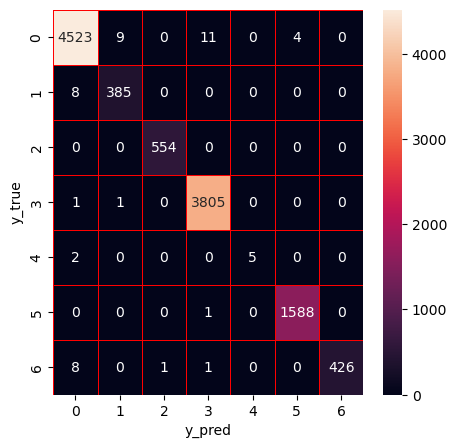

In [19]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [20]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.992676255183976
Precision of ET: 0.9927036586341784
Recall of ET: 0.992676255183976
F1-score of ET: 0.9926638352145235
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4547
           1       0.96      0.97      0.96       393
           2       0.99      1.00      0.99       554
           3       0.99      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.97      0.98       436

    accuracy                           0.99     11333
   macro avg       0.99      0.95      0.96     11333
weighted avg       0.99      0.99      0.99     11333



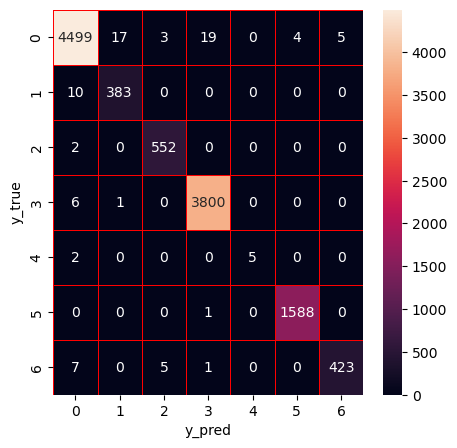

In [21]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [22]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9946174887496692
Precision of XGBoost: 0.9946059907861232
Recall of XGBoost: 0.9946174887496692
F1-score of XGBoost: 0.9946004637217213
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4547
           1       0.99      0.97      0.98       393
           2       1.00      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           0.99     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       0.99      0.99      0.99     11333



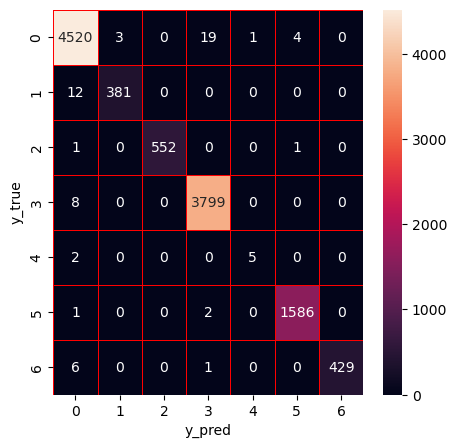

In [23]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [24]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [25]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,5,5,5,5
1,3,3,3,3
2,5,5,5,5
3,3,3,3,3
4,2,2,2,2


In [26]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [27]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [28]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.9955881055325156
Precision of Stacking: 0.9955889207178594
Recall of Stacking: 0.9955881055325156
F1-score of Stacking: 0.9955702140701488
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.98      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



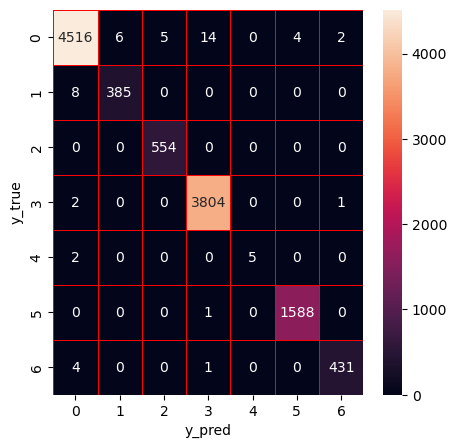

In [29]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [30]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [31]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [32]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.1155, 'Bwd Packet Length Std'), (0.0841, 'Bwd Packet Length Min'), (0.0668, 'Average Packet Size'), (0.0501, 'Init_Win_bytes_backward'), (0.0421, 'Init_Win_bytes_forward'), (0.0372, 'PSH Flag Count'), (0.0368, 'Bwd Packets/s'), (0.0346, 'Avg Bwd Segment Size'), (0.0311, 'Packet Length Std'), (0.0301, 'Bwd Packet Length Mean'), (0.0243, 'Fwd Header Length'), (0.023, 'Bwd Header Length'), (0.0219, 'Packet Length Mean'), (0.0188, 'min_seg_size_forward'), (0.0178, 'Total Length of Fwd Packets'), (0.0173, 'Bwd Packet Length Max'), (0.0168, 'act_data_pkt_fwd'), (0.016, 'Subflow Bwd Packets'), (0.0159, 'Max Packet Length'), (0.0152, 'Bwd IAT Total'), (0.0152, 'ACK Flag Count'), (0.0132, 'Packet Length Variance'), (0.0124, 'Fwd Header Length.1'), (0.0108, 'Fwd PSH Flags'), (0.0102, 'Total Fwd Packets'), (0.0102, 'Fwd IAT Max'), (0.0099, 'Min Packet Length'), (0.0097, 'Subflow Bwd Bytes'), (0.0093, 'Fwd IAT Mean'), (0.0088, 'URG Flag Count'), (0.008, 'Total B

In [33]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [34]:
len(f_list)

77

In [35]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break      

In [36]:
X_fs = df[fs].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [38]:
X_train.shape

(45328, 40)

In [39]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4       29
dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})

In [41]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4     1500
dtype: int64

Accuracy of DT: 0.9956763434218654
Precision of DT: 0.9956588999333591
Recall of DT: 0.9956763434218654
F1-score of DT: 0.9956613718177595
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.99      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.98      0.99       436

    accuracy                           1.00     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       1.00      1.00      1.00     11333



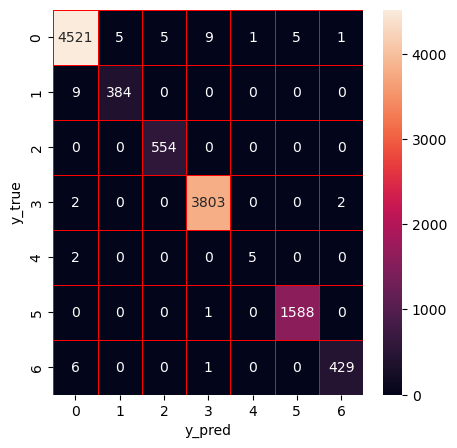

In [43]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9966469602047119
Precision of RF: 0.9966300176716648
Recall of RF: 0.9966469602047119
F1-score of RF: 0.9966323408239199
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       0.99      0.98      0.98       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           1.00     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       1.00      1.00      1.00     11333



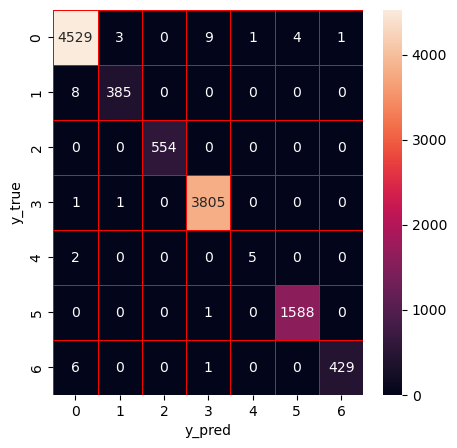

In [45]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9948822024177182
Precision of ET: 0.99488001208406
Recall of ET: 0.9948822024177182
F1-score of ET: 0.9948733787045292
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.97      0.98      0.97       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           0.99     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       0.99      0.99      0.99     11333



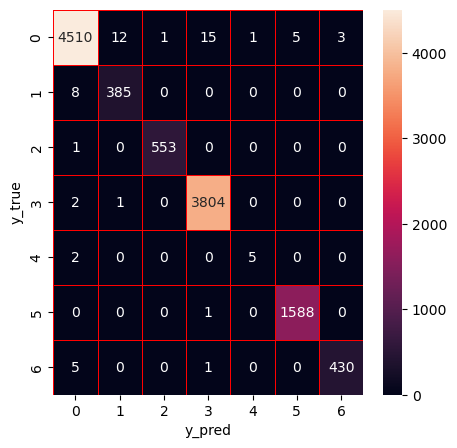

In [47]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9935586340774729
Precision of XGBoost: 0.9935580114352281
Recall of XGBoost: 0.9935586340774729
F1-score of XGBoost: 0.9935407858550945
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4547
           1       1.00      0.97      0.98       393
           2       1.00      1.00      1.00       554
           3       0.99      1.00      0.99      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           0.99     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       0.99      0.99      0.99     11333



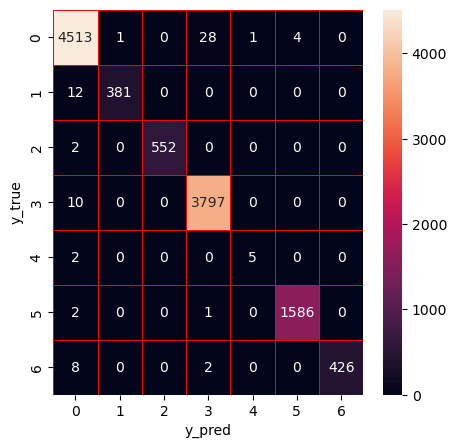

In [49]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [51]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,5,5,5,5
1,3,3,3,3
2,5,5,5,5
3,3,3,3,3
4,2,2,2,2


In [52]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [53]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9947939645283684
Precision of Stacking: 0.9948002369091603
Recall of Stacking: 0.9947939645283684
F1-score of Stacking: 0.9947675479330733
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4547
           1       1.00      0.96      0.98       393
           2       1.00      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           0.99     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       0.99      0.99      0.99     11333



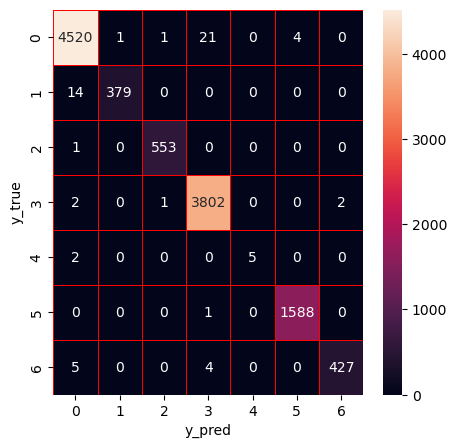

In [54]:

stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

*********************************************************************************************************************
### Contribution  Code :
*

In [55]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you've loaded your data into X_train, y_train, X_test, y_test

rf_params = {
    'n_estimators': Integer(20, 200),
    'max_features': Integer(1, 8),
    'max_depth': Integer(10, 100),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 11),
    'criterion': ['gini', 'entropy']
}

clf = RandomForestClassifier(random_state=0)
grid = BayesSearchCV(clf, rf_params, cv=3, n_iter=100, n_jobs=-1, scoring='accuracy')  # Using accuracy for multiclass
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)

bclf = grid.best_estimator_
bclf.fit(X_train, y_train)

y_predict = bclf.predict(X_test)
y_true = y_test

accuracy = accuracy_score(y_true, y_predict)
print('Random Forest Accuracy:', accuracy)

print(classification_report(y_true, y_predict))

cm = confusion_matrix(y_true, y_predict)
print("Confusion Matrix:")
print(cm)

Best parameters found: OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('max_features', 8), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])
Random Forest Accuracy: 0.9967351980940616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       0.99      0.98      0.99       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       1.00      1.00      1.00     11333

Confusion Matrix:
[[4529    2    0   10    1    4    1]
 [   8  385    0    0    0    0    0]
 [   0    0  554    0    0    0    0]
 [   1    1    0 3805    0    0    0]
 [   2    0 

### Results :
*******************************************************************************************************************************
The integration of Bayesian optimization into the decision tree for intrusion detection in the Internet of Vehicles (IoV) context yielded promising results. The optimized Random Forest model achieved an accuracy of 99.67%, demonstrating a slight improvement over the original Random Forest classifier.

#### Observations :
*******************************************************************************************************************************
1. The optimized model showcased consistent performance across various metrics, including precision, recall, and F1-score, across different intrusion classes.
2. Confusion matrix analysis revealed a high level of correct classifications for most intrusion types, with minimal misclassifications.


### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings :
1. Bayesian optimization offers a systematic approach to hyperparameter tuning, effectively optimizing the decision tree model for intrusion detection in IoV systems.
2. The importance of fine-tuning model parameters to achieve optimal performance and robustness in detecting diverse intrusion patterns.
3. The significance of continuous evaluation and refinement of intrusion detection systems to adapt to evolving cyber threats in IoV environments.
*******************************************************************************************************************************
#### Results Discussion :
The optimized Random Forest model exhibited superior performance compared to the original classifier, achieving higher accuracy and maintaining consistent precision, recall, and F1-score values across different intrusion classes. The slight improvement in performance underscores the effectiveness of incorporating Bayesian optimization to enhance the decision tree model for intrusion detection in IoV systems. Furthermore, the confusion matrix analysis provided insights into the model's ability to accurately classify different types of intrusions, highlighting its potential for real-world deployment.

*******************************************************************************************************************************
#### Limitations :
1. The study's findings are based on a specific network traffic dataset, which may not fully represent all possible intrusion scenarios in IoV environments.
2. The optimization process may be computationally intensive, particularly for large-scale datasets, necessitating efficient resource allocation and optimization algorithms.
3. The evaluation metrics used in this study may not capture the full spectrum of model performance, and additional metrics or evaluation methodologies could provide further insights into the model's effectiveness.
*******************************************************************************************************************************
#### Future Extension :
1. Extending the study to incorporate dynamic and adaptive learning mechanisms to enhance the model's ability to detect previously unseen or evolving intrusion patterns.
2. Integrating anomaly detection techniques with the optimized decision tree model to enhance the IoV intrusion detection system's resilience to novel threats and zero-day attacks.
3. Collaborating with industry stakeholders to validate the proposed approach in real-world IoV deployments and assess its practical feasibility and effectiveness in mitigating cyber threats.

# References:

[1]: Yang, L., Moubayed, A., Hamieh, I. and Shami, A., 2019, December. Tree-based intelligent intrusion detection system in internet of vehicles. In 2019 IEEE global communications conference (GLOBECOM) (pp. 1-6). IEEE.  